
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Optimización de funciones escalares diferenciables con `SymPy` </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

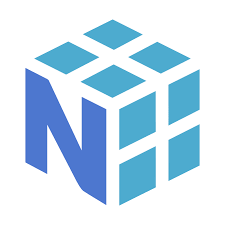

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# importar la librería numpy
import numpy as np

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [2]:
# importar la librería sympy
import sympy as sym

$$ \dot{x} = x + \frac{1}{1-e^x}$$

In [4]:
sym.init_printing(use_latex='mathjax')

$$y=f(x)=x^2$$

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [ ]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

In [5]:
np.sin(3.1416)

-7.346410206643587e-06

In [6]:
sym.sin(3.1416)

-7.34641020664359e-6

In [8]:
arr=np.array([1,2,3])
np.sin(arr)

array([0.84147098, 0.90929743, 0.14112001])

In [9]:
sym.sin(arr)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [10]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# Lo siguiente es equivalente
# from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

In [12]:
x = np.linspace(0,100)
y = np.sin(x)

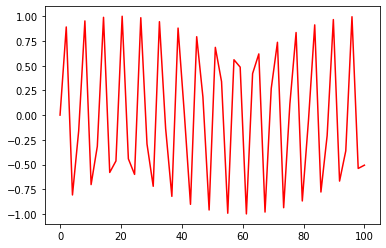

In [14]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'-r')
plt.show()

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [15]:
# declarar la variable real x
sym.var('x')

x

In [16]:
# declarar ahora f=x^2 y mostrar
f = x**2
f

 2
x 

In [17]:
# derivar f respecto a x y mostrar
df = sym.diff(f,x)
df

2⋅x

In [18]:
# resolver f'(x)=0 y mostrar soluciones
help(sym.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Explanation
    
    Currently supported:
        - polynomial
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions
    
    Examples
    
    The output varies according to the input and can be seen by example:
    
        >>> from sympy import solve, Poly, Eq, Function, exp
        >>> from sympy.abc import x, y, z, a, b
        >>> f = Function('f')
    
    Boolean or univariate Relational:
    
        >>> solve(x < 3)
        (-oo < x) & (x < 3)
    
    
    To always get a list of solution mappings, use flag dict=True:
    
        >>> solve(x - 3, dict=True)
        [{x: 3}]
        >>> sol = solve([x - 3, y - 1], dict=True)
        >>> sol
        [{x: 3, y: 1}]
        >>> sol[0][x]
        3
        

In [ ]:
# x^2 + 2x +1
# x^2 + 2x +1=0

# x^2 +2x+1 = 5 --->x^2 +2x+1 - 5 = 0

In [19]:
## 2x = 0 --> x=0
soluciones = sym.solve(df, x)
soluciones

[0]

In [22]:
soluciones[0]

0

In [24]:
# Encuentra también soluciones complejas
s = sym.solve(x**2 + 1, x)
s

[-ⅈ, ⅈ]

In [ ]:
# x^2 + 1 = 0
# x^2 = -1
# x = +-sqrt(-1)
# x = +- i -----> x1 = i, x2 = -i

In [27]:
s[0], s[1]

(-ⅈ, ⅈ)

In [28]:
# Puedo resolver ecuaciones que involucren más de una variable
sym.var('y')
s3 = sym.solve(x**3 + y, x)
s3

⎡          3 ____        3 ____    3 ____        3 ____⎤
⎢3 ____    ╲╱ -y    √3⋅ⅈ⋅╲╱ -y     ╲╱ -y    √3⋅ⅈ⋅╲╱ -y ⎥
⎢╲╱ -y , - ────── - ───────────, - ────── + ───────────⎥
⎣            2           2           2           2     ⎦

Veamos la gráfica...

In [34]:
f

 2
x 

In [31]:
x_num = np.linspace(0,10,100)
x_num

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [32]:
f(x_num)

TypeError: 'Pow' object is not callable

In [30]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify(x,f, modules = 'numpy')

In [33]:
f_num(x_num)

array([0.00000000e+00, 1.02030405e-02, 4.08121620e-02, 9.18273646e-02,
       1.63248648e-01, 2.55076013e-01, 3.67309458e-01, 4.99948985e-01,
       6.52994592e-01, 8.26446281e-01, 1.02030405e+00, 1.23456790e+00,
       1.46923783e+00, 1.72431385e+00, 1.99979594e+00, 2.29568411e+00,
       2.61197837e+00, 2.94867871e+00, 3.30578512e+00, 3.68329762e+00,
       4.08121620e+00, 4.49954086e+00, 4.93827160e+00, 5.39740843e+00,
       5.87695133e+00, 6.37690032e+00, 6.89725538e+00, 7.43801653e+00,
       7.99918376e+00, 8.58075707e+00, 9.18273646e+00, 9.80512193e+00,
       1.04479135e+01, 1.11111111e+01, 1.17947148e+01, 1.24987246e+01,
       1.32231405e+01, 1.39679625e+01, 1.47331905e+01, 1.55188246e+01,
       1.63248648e+01, 1.71513111e+01, 1.79981635e+01, 1.88654219e+01,
       1.97530864e+01, 2.06611570e+01, 2.15896337e+01, 2.25385165e+01,
       2.35078053e+01, 2.44975003e+01, 2.55076013e+01, 2.65381084e+01,
       2.75890215e+01, 2.86603408e+01, 2.97520661e+01, 3.08641975e+01,
      

In [35]:
# Coordenadas x (abscisas)
x_num = np.linspace(-5,5,100)
x_num

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

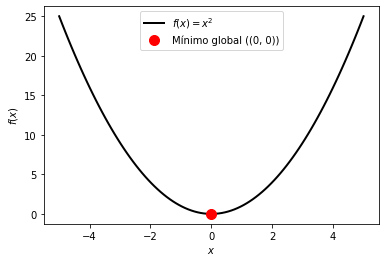

In [46]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num,          #puntos en x
        f_num(x_num),    #La función evaluada en x
        'k',             #color de linea
         lw=2,           #grosor de linea
         label= '$f(x)=x^2$' # Etiqueta de la gráfica
        )
#Graficando el punto mínimo
plt.plot(soluciones[0],        #coordenada en x del punto óptimo
         f_num(soluciones[0]), #coordenada en y del punto óptimo
        'ro',                  # el color del punto
        ms=10,                 # el grosor del punto a graficar
        label = f'Mínimo global ({soluciones[0], f_num(soluciones[0])})' #etiqueta de la gráfica
        )

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.show()

In [41]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Ver diferencias entre f y f_num

In [47]:
f

 2
x 

In [48]:
f_num(np.array([1,2]))

array([1, 4], dtype=int32)

**Otra manera de hacer lo anterior**

Concepto de función...

In [49]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]
def h(x):
    return x**2

In [53]:
h(1), h(2.0), h(np.array([1,2])), h(x)

(1, 4, array([1, 4], dtype=int32), x**2)

In [54]:
h(x)

 2
x 

In [55]:
dh = sym.diff(h(x), x)
dh

2⋅x

In [56]:
sol = sym.solve(dh,x)
sol

[0]

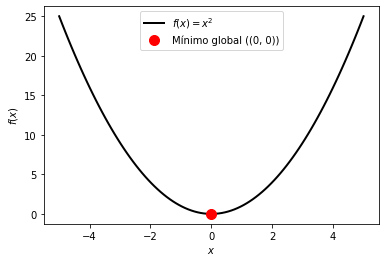

In [57]:
plt.figure(figsize=(6,4))
plt.plot(x_num,          #puntos en x
        h(x_num),    #La función evaluada en x
        'k',             #color de linea
         lw=2,           #grosor de linea
         label= '$f(x)=x^2$' # Etiqueta de la gráfica
        )
#Graficando el punto mínimo
plt.plot(sol[0],        #coordenada en x del punto óptimo
         h(sol[0]), #coordenada en y del punto óptimo
        'ro',                  # el color del punto
        ms=10,                 # el grosor del punto a graficar
        label = f'Mínimo global ({sol[0], h(sol[0])})' #etiqueta de la gráfica
        )

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.show()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [58]:
# Declarar la variable simbolica x
sym.var('x')

x

In [59]:
# Definimos funcion g(x)
def g(x):
    return x**3

In [60]:
g(x)

 3
x 

In [61]:
g(2)

8

In [62]:
g(np.array([1,2]))

array([1, 8], dtype=int32)

In [63]:
# Derivamos g(x)
dg = sym.diff(g(x), x)
dg

   2
3⋅x 

In [64]:
# Puntos criticos (sy.solve(dg,x))
soluciones = sym.solve(dg, x)
soluciones

[0]

In [76]:
x_num = np.linspace(-10,10)


$g(x) = x^3$

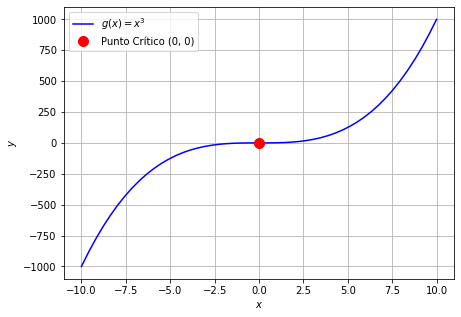

In [79]:
# graficar
plt.figure(figsize=(7,5))
plt.plot(x_num, g(x_num), 'b',label='$g(x)=x^3$')
plt.plot(soluciones[0], g(soluciones[0]), 'ro', ms=10, 
         label=f'Punto Crítico {soluciones[0],g(soluciones[0])}')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()



## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [80]:
# Sacamos la segunda derivada
def f(x):
    return x**2

In [81]:
df = sym.diff(f(x),x)
df

2⋅x

In [82]:
# 1er forma para obtener la segunda derivada
d2f = sym.diff(df, x)
d2f

2

In [83]:
# 2da forma
d2f = sym.diff(f(x),x,x)
d2f

2

In [85]:
# 3er forma
d2f = sym.diff(f(x),x,2)
d2f

2

In [86]:
#Ejemplo de sustición de la variable x en la derivada de la función
df.subs({x:0})

0

In [87]:
d2f.subs({x:0})

2

In [ ]:
# Formas equivalentes de obtener la segunda derivada

# Formas
#d2f = sym.diff(f,x,x)
#d2f = sym.diff(f,x,2)

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [88]:
# Definimos la función g(x)=x^3
def g(x):
    return x**3

In [89]:
g(x)

 3
x 

In [90]:
# Sacamos la derivada de la función g respecto a x g'(x)=3x^2
dg = sym.diff(g(x),x)
dg

   2
3⋅x 

In [91]:
sol = sym.solve(dg,x)
sol

[0]

In [92]:
# Observamos que g'(0)=0 (es un punto crítico)
sol[0]

0

In [93]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x
d2g = sym.diff(g(x),x,2)
d2g

6⋅x

In [94]:
# Evaluamos g''(0)
d2g.subs({x:sol[0]})

0

In [ ]:
def criterio_segunda_derivada(f, sol):
    
    print(f'{sol[0], f(sol[0])}, Es un mínimo')
    print(f'{sol[0], f(sol[0])}, Es un máximo')
    print(f'{sol[0], f(sol[0])}, No decide')

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

In [ ]:
# 1.- definir la variable simbólica

In [ ]:
# 2.- Definir la función

In [ ]:
# 3.- Derivar la función

In [ ]:
# 4.- Encontrar los puntos críticos

In [ ]:
# 5.- Probar el criterio de la segunda derivada para ver
#     si el pto crítico es mínimo o máximo relativo



## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [95]:
# Definimos f
def f(x):
    return x**2 - 6*x

In [96]:
f(x)

 2      
x  - 6⋅x

In [97]:
# Derivamos f
df = sym.diff(f(x),x)
df

2⋅x - 6

In [98]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos
p_c = sym.solve(df,x)
p_c

[3]

In [99]:
p_c[0]

3

Evaluamos $f$ en los extremos y en los puntos críticos:

In [100]:
#Extremos de la función [0, 5]
a=0
b=5

In [101]:
f(p_c[0]), f(a), f(b)

(-9, 0, -5)

In [ ]:
# realizar un pequeño código para obtener los puntos minimos y máximos de la funcion definida en un intervalo
list_eval = [p_c[0], a,b]
f_list = f(list_eval)

y_eval = f_list.sort()
x_eval_ind = f_list.argsort()
x_eval = list_eval(x_eval_ind)


Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

In [102]:
x_num = np.linspace(0,5)

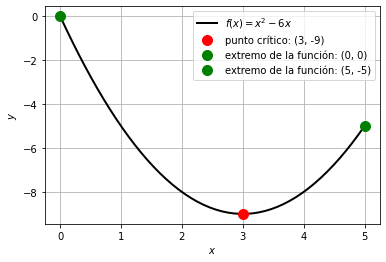

In [105]:
# graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, f(x_num), 'k', lw=2, label='$f(x)=x^2 - 6x$')

plt.plot(p_c[0],f(p_c[0]), 'ro', ms=10,
        label=f'punto crítico: {p_c[0], f(p_c[0])}')

plt.plot(0,f(0), 'go', ms=10,
        label=f'extremo de la función: {0, f(0)}')
plt.plot(5,f(5), 'go', ms=10,
        label=f'extremo de la función: {5, f(5)}')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

In [106]:
sym.var('x')

x

In [107]:
#definimos la función
def h(x):
    return x**3 - 3*x

In [108]:
h(x)

 3      
x  - 3⋅x

In [109]:
# derivar h(x)
dh = sym.diff(h(x),x)
dh


   2    
3⋅x  - 3

In [111]:
#Resolver la ecuacion dh=0, encontrar los pc
p_c = sym.solve(dh,x)
p_c

[-1, 1]

In [112]:
p_c[0], p_c[1]

(-1, 1)

In [113]:
# El intervalo [a,b]
a=-2.2
b=1.8

In [114]:
#Evaluar h(c1), h(c2), h(a), h(b)
# [a,b] = [-2.2, 1.8]
h(p_c[0]), h(p_c[1]), h(a), h(b)

(2, -2, -4.048000000000003, 0.4320000000000004)

In [ ]:
# el valor mínimo se alcanza en: a, h(a) = (-2.2,-4.048)
# el valor máximo se alcanza en: p_c[0], h(p_c[0]) = (-1,2) 

In [115]:
x_num = np.linspace(a,b)
x_num

array([-2.2       , -2.11836735, -2.03673469, -1.95510204, -1.87346939,
       -1.79183673, -1.71020408, -1.62857143, -1.54693878, -1.46530612,
       -1.38367347, -1.30204082, -1.22040816, -1.13877551, -1.05714286,
       -0.9755102 , -0.89387755, -0.8122449 , -0.73061224, -0.64897959,
       -0.56734694, -0.48571429, -0.40408163, -0.32244898, -0.24081633,
       -0.15918367, -0.07755102,  0.00408163,  0.08571429,  0.16734694,
        0.24897959,  0.33061224,  0.4122449 ,  0.49387755,  0.5755102 ,
        0.65714286,  0.73877551,  0.82040816,  0.90204082,  0.98367347,
        1.06530612,  1.14693878,  1.22857143,  1.31020408,  1.39183673,
        1.47346939,  1.55510204,  1.63673469,  1.71836735,  1.8       ])

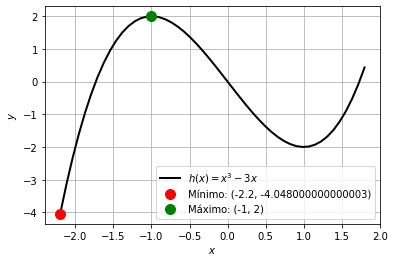

In [116]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, h(x_num), 'k', lw=2, label='$h(x)=x^3 - 3x$')

plt.plot(a,h(a), 'ro', ms=10,
        label=f'Mínimo: {a, h(a)}')

plt.plot(p_c[0],h(p_c[0]), 'go', ms=10,
        label=f'Máximo: {p_c[0], h(p_c[0])}')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

### Problema:
Se desea construir una lata cilíndrica de 250 $ml$ ¿Cuál es el radio de la base ($r$) y la altura del cilíndro ($h$) para minimizar la superficie?

1. Identificar qué se quiere minimizar (o maximizar):

    **Solución**
    
    Minimizar la superficie de un cilíndro ($S$).
    
    $$
    S=A_B+A_R,
    $$
    donde $A_B$ es el área de la base y $A_R$ es el área de la zona recta.
    $$
    A_B=\pi r^2,
    $$
    $$
    A_R=h \pi2r.
    $$
    
    Entonces $S=\pi r^2+h\pi2r$.
    
2. Incluir las restricciones:

    **Solución**
    
    El volumen ($V$) debe ser 250 $ml$=250 $cm^3$.
    
    $$
    V=\pi r^2h=250.
    $$
    
    Por lo que $h=\frac{250}{\pi r^2}$. Sustituyendo en $S$
    $$
    S=\pi r^2+\frac{250}{\pi r^2}\pi2r,
    $$
    simplificando, tenemos
    $$
    S=\pi r^2+\frac{500}{r}.
    $$

# Anuncios

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)
